# **SHAP values**

Deep SHAP is a high-speed approximation algorithm for SHAP values in deep learning models that builds on a connection with DeepLIFT described in the SHAP NIPS paper. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shap

from tensorflow.keras.models import load_model

DATA_DIR = '../Datasets/'
MODELS_DIR = '../Models/'

# TRAIN_PATH = DATA_DIR + '/Dataset_train.csv'
# TRAIN_CF_PATH = DATA_DIR + '/Dataset_train_CF.csv'

TEST_PATH = DATA_DIR + '/Dataset_test_paper.csv'
#TEST_CF_PATH = DATA_DIR + '/Dataset_test_CF.csv'

MODEL_PATH = MODELS_DIR + 'Pphys.h5'
#MODEL_CF_PATH = MODELS_DIR + 'Pres_hybrid_CF.h5'

#SAMPLES = 10_000
SAMPLES = 1_000

Load datasets and model, then fit explainer and return SHAP values:

In [13]:
def show_shap_values(test_path, model_path, reduced_size=None):
    
    model = load_model(model_path)

    X_test = pd.read_csv(test_path, index_col=0)
    X_test.reset_index(drop=True, inplace=True)
    X_test = X_test[['V','theta','W']]
    print(X_test.columns)

    if reduced_size:
        test_data = X_test.sample(n=reduced_size, replace=False).to_numpy()
    else:
        test_data = X_test.to_numpy()

    explainer = shap.Explainer(model, test_data, feature_names=X_test.columns)
    shap_values = explainer(test_data)

    return shap_values

## Default model

Plots for the vanilla model and dataset.

In [14]:
# Load modules neccesary to load the Pphys model
import sys
sys.path.insert(0,'../Training_paper')  # add previous directory to path to load constants module
import constants as const

from keras import backend as K
from keras.layers import Input, Lambda
from keras.layers import Concatenate
Cp_max = 0.5926
V_mean = 6.314169410268349
V_std = 1.9826865496833004
model = load_model(MODELS_DIR + 'Pphys.h5')
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xphys (InputLayer)          [(None, 3)]                  0         []                            
                                                                                                  
 lambda (Lambda)             (None, 1)                    0         ['xphys[0][0]']               
                                                                                                  
 sequential_1 (Sequential)   (None, 1)                    17153     ['xphys[0][0]']               
                                                                                                  
 lambda_3 (Lambda)           (None, 1)                    0         ['lambda[0][0]',              
                                                                     'sequential_1[0][0]']    

In [28]:
shap_values_default = show_shap_values(TEST_PATH, MODEL_PATH, SAMPLES)

Index(['V', 'theta', 'W'], dtype='object')


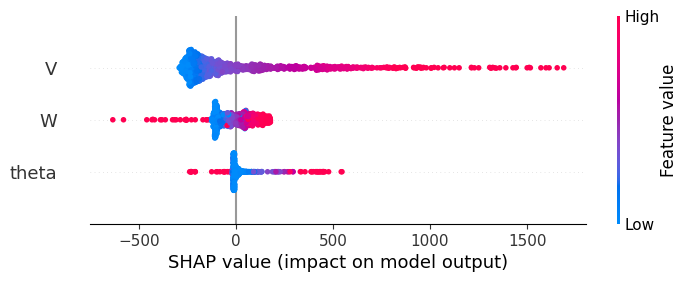

In [29]:
shap.plots.beeswarm(shap_values_default/1000, max_display=10)

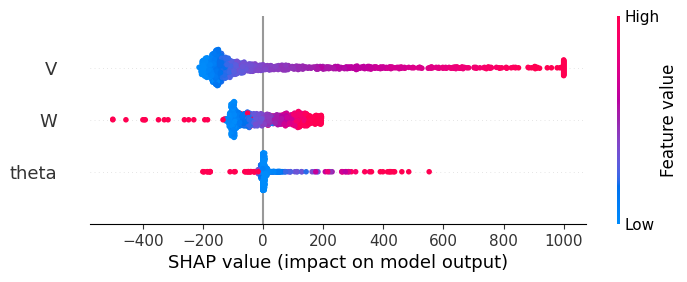

In [23]:
""" # Removing outliers:
shap_values_default_no_out = shap_values_default
shap_values_default_no_out.values = np.clip(shap_values_default_no_out.values/1000, -500, 1000)

shap.plots.beeswarm(shap_values_default_no_out, max_display=10) """

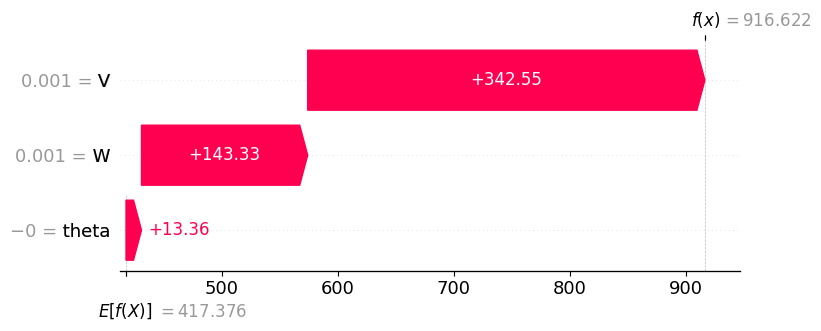

In [31]:
shap.plots.waterfall(shap_values_default[0]/1000, max_display=20)

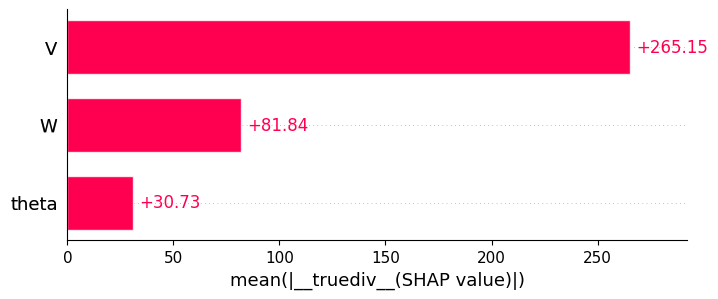

In [34]:
shap.plots.bar(shap_values_default/1000, max_display=20)

(1000, 3)
(1000, 1)
(1000, 3)
['V', 'theta', 'W']


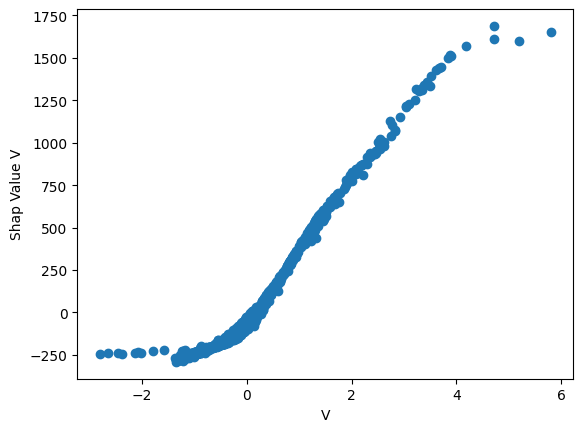

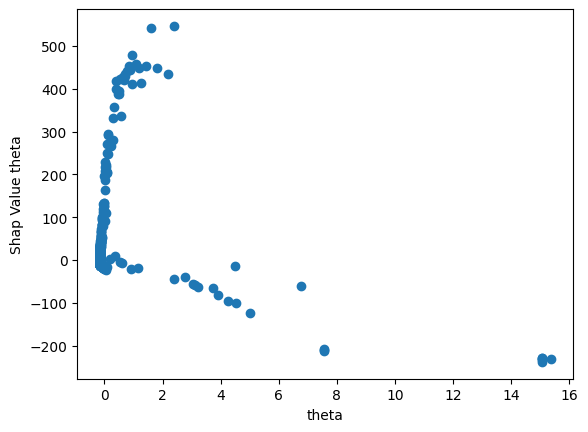

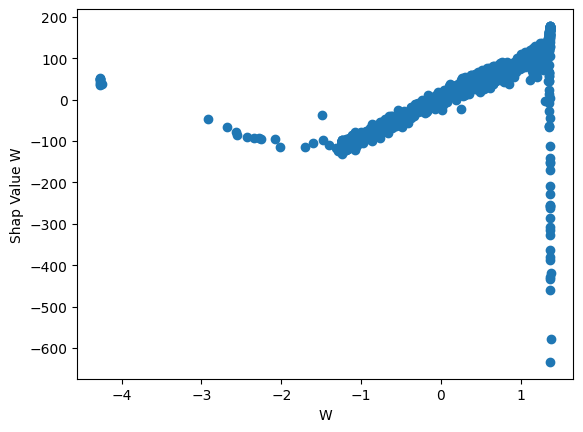

In [44]:
# Scatter plot of shap value vs variable

print(shap_values_default.values.shape)
print(shap_values_default.base_values.shape)
print(shap_values_default.data.shape)
print(shap_values_default.feature_names)

x_id = shap_values_default.feature_names.index("V")
y_id = shap_values_default.feature_names.index("V")
plt.scatter(shap_values_default.data[:,x_id],shap_values_default.values[:,y_id]/1000)
plt.xlabel(shap_values_default.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values_default.feature_names[y_id])
plt.show()

x_id = shap_values_default.feature_names.index("theta")
y_id = shap_values_default.feature_names.index("theta")
plt.scatter(shap_values_default.data[:,x_id],shap_values_default.values[:,y_id]/1000)
plt.xlabel(shap_values_default.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values_default.feature_names[y_id])
plt.show()

x_id = shap_values_default.feature_names.index("W")
y_id = shap_values_default.feature_names.index("W")
plt.scatter(shap_values_default.data[:,x_id],shap_values_default.values[:,y_id]/1000)
plt.xlabel(shap_values_default.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values_default.feature_names[y_id])
plt.show()

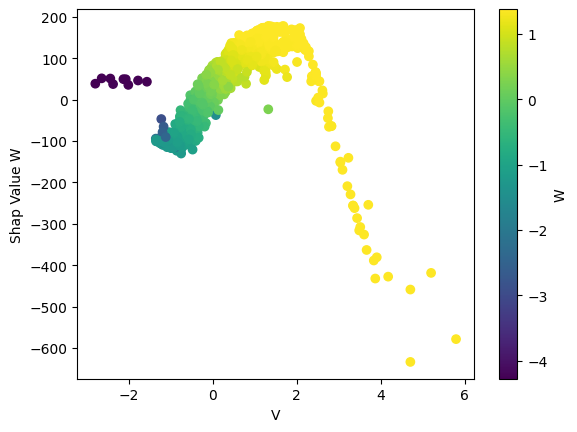

In [51]:
# Plot Shap W vs V data (color W data)

v_id = shap_values_default.feature_names.index("V")
w_id = shap_values_default.feature_names.index("W")
plt.scatter(shap_values_default.data[:,v_id],shap_values_default.values[:,w_id]/1000, c=shap_values_default.data[:,w_id],cmap='viridis')
#plt.colorbar(label='Third Variable (z)')
plt.colorbar(label=shap_values_default.feature_names[w_id])
plt.xlabel(shap_values_default.feature_names[v_id])
plt.ylabel("Shap Value "+shap_values_default.feature_names[w_id])
plt.show()

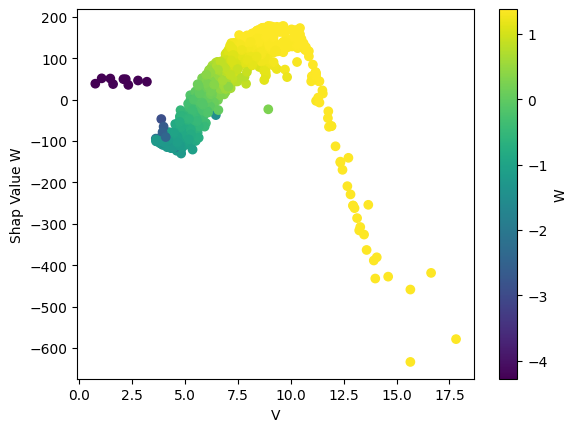

In [62]:
# Plot Shap W vs V data (color W data)

v_id = shap_values_default.feature_names.index("V")
w_id = shap_values_default.feature_names.index("W")
v_shap = shap_values_default.values[:,v_id]
w_shap = shap_values_default.values[:,w_id]
v_data = shap_values_default.data[:,v_id] * V_std + V_mean
w_data = shap_values_default.data[:,w_id]
plt.scatter(v_data,w_shap/1000, c=w_data,cmap='viridis')
plt.colorbar(label='W')
plt.xlabel('V')
plt.ylabel("Shap Value W")
plt.show()

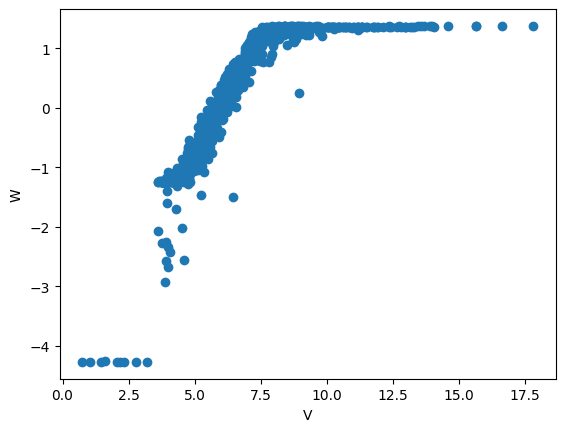

In [63]:
# Plot V_data vs W_data
plt.scatter(v_data,w_data)
plt.xlabel('V')
plt.ylabel("W")
plt.show()

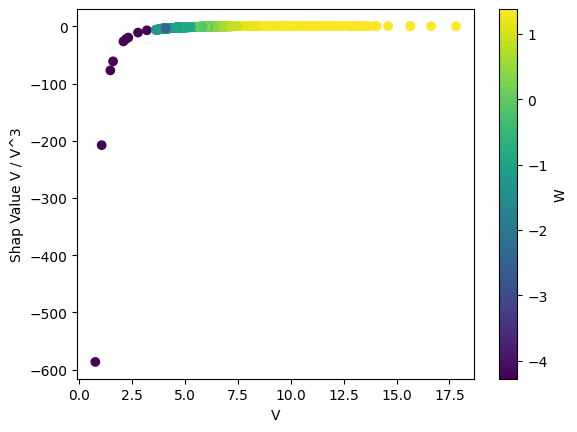

In [61]:
v_id = shap_values_default.feature_names.index("V")
w_id = shap_values_default.feature_names.index("W")
v_shap = shap_values_default.values[:,v_id]
v_data = shap_values_default.data[:,v_id] * V_std + V_mean
w_data = shap_values_default.data[:,w_id] 
plt.scatter(v_data,v_shap/1000/v_data**3, c=w_data,cmap='viridis')
plt.colorbar(label="W")
plt.xlabel("V")
plt.ylabel("Shap Value V / V^3")
#plt.xlim((-2.5,5))
plt.show()